# Visualizer
### Use this script to visualize the neuron traces according to the paper "A Generalized Linear Integrate-and-Fire Neural Model Produces Diverse Spiking Behaviors" by Stefan Mihalas and Ernst Niebur. Further, data was created with a fix length of 1sec (1ms time steps), with noise on the input current, and/or temporal jitter on the time point of the step for dynamic inputs. 

### The script will also calculate the inter-spike intervalls (ISIs) for a single trial and for all repeating trials, whenever possible. For repeating trials, all ISIs are grouped and further statics represent the outcome of all repetitions per class.

In [5]:
import pickle
import progressbar

from tactile_encoding.utils.utils import create_directory
from utils.functions import plot_traces_original, plot_isi_original, \
    plot_traces_fix_len, plot_single_isi_fix_len, plot_isi_fix_len
from utils.functions import plot_traces_fix_len_param_sweep, \
    plot_single_isi_fix_len_param_sweep, plot_isi_fix_len_param_sweep


In [6]:
path = './plots/original'  # set path to store plots
data_path = './data/original_mn_output'
create_directory(path)  # create folder if not existent
data_types = ['', '_noisy', '_temp_jitter', '_offset', '_noisy_temp_jitter',
              '_noisy_offset', '_temp_jitter_offset', '_noisy_temp_jitter_offset']
max_trials = 100

## Original data 
### with noise, temporal jitter, and offset

In [9]:
bar = progressbar.ProgressBar(maxval=len(data_types),
                              widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
bar.start()

for counter, data_type in enumerate(data_types):
    # original
    if data_type == '':
        add_noise = False
        temp_jitter = False
        add_offset = False
    # single
    elif data_type == '_noisy':
        add_noise = True
        temp_jitter = False
        add_offset = False
    elif data_type == '_temp_jitter':
        add_noise = False
        temp_jitter = True
        add_offset = False
    elif data_type == '_offset':
        add_noise = False
        temp_jitter = False
        add_offset = True
    # combination of two
    elif data_type == '_noisy_temp_jitter':
        add_noise = True
        temp_jitter = True
        add_offset = False
    elif data_type == '_noisy_offset':
        add_noise = True
        temp_jitter = False
        add_offset = True
    elif data_type == '_temp_jitter_offset':
        add_noise = False
        temp_jitter = True
        add_offset = True
    # combination of three
    elif data_type == '_noisy_temp_jitter_offset':
        add_noise = True
        temp_jitter = True
        add_offset = True

    # load data
    filename = 'data_encoding_original' + data_type
    infile = open(f"{data_path}/{filename}.pkl", 'rb')
    data = pickle.load(infile)
    infile.close()

    # create plots
    plot_traces_original(path, data, add_offset=add_offset, add_noise=add_noise,
                         temp_jitter=temp_jitter)

    plot_isi_original(path, data, add_offset=add_offset, add_noise=add_noise,
                      temp_jitter=temp_jitter, norm_count=True, norm_time=True)
    bar.update(counter+1)
bar.finish()


8
0


1


2


3


4


# Fix length data (with noise, temporal jitter, and offset)

KeyboardInterrupt: 

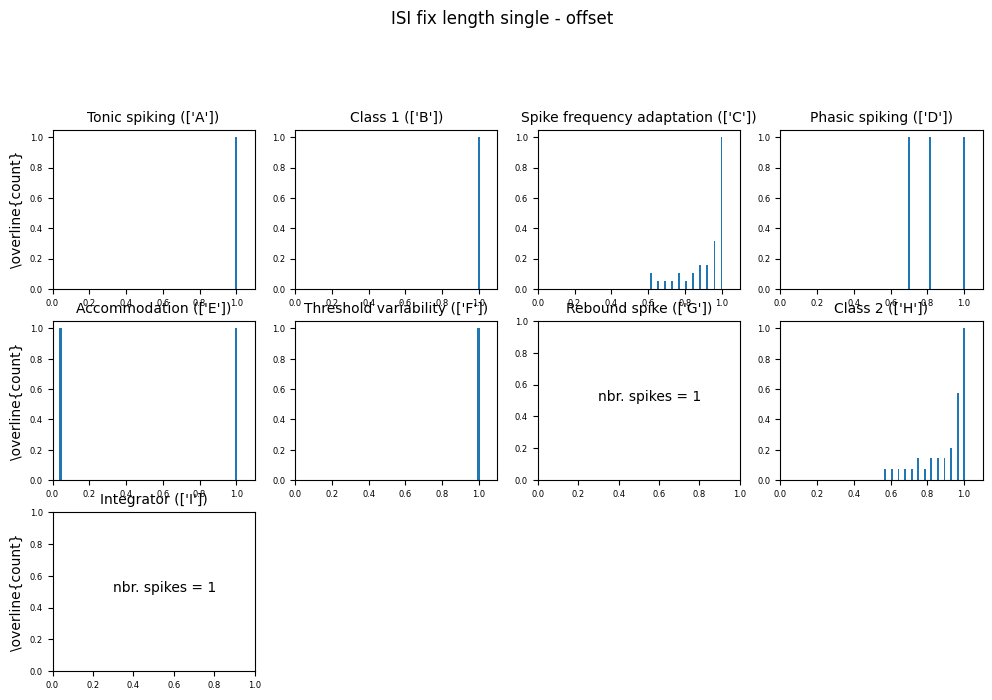

In [8]:
bar = progressbar.ProgressBar(maxval=len(data_types),
                              widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
bar.start()

for _, data_type in enumerate(data_types):
    # original
    if data_type == '':
        add_noise = False
        temp_jitter = False
        add_offset = False
    # single
    elif data_type == '_noisy':
        add_noise = True
        temp_jitter = False
        add_offset = False
    elif data_type == '_temp_jitter':
        add_noise = False
        temp_jitter = True
        add_offset = False
    elif data_type == '_offset':
        add_noise = False
        temp_jitter = False
        add_offset = True
    # combination of two
    elif data_type == '_noisy_temp_jitter':
        add_noise = True
        temp_jitter = True
        add_offset = False
    elif data_type == '_noisy_offset':
        add_noise = True
        temp_jitter = False
        add_offset = True
    elif data_type == '_temp_jitter_offset':
        add_noise = False
        temp_jitter = True
        add_offset = True
    # combination of three
    elif data_type == '_noisy_temp_jitter_offset':
        add_noise = True
        temp_jitter = True
        add_offset = True

    filename = 'data_encoding_fix_len' + data_type
    infile = open(f"{data_path}/{filename}.pkl", 'rb')
    data = pickle.load(infile)
    infile.close()
    # create plots
    plot_traces_fix_len(path, data, max_trials=max_trials,
                        add_offset=add_offset, add_noise=add_noise, temp_jitter=temp_jitter)

    plot_single_isi_fix_len(path, data, max_trials=max_trials,
                            add_offset=add_offset, add_noise=add_noise, temp_jitter=temp_jitter, norm_count=True, norm_time=True)

    plot_isi_fix_len(path, data, max_trials=max_trials,
                     add_offset=add_offset, add_noise=add_noise, temp_jitter=temp_jitter, norm_count=True, norm_time=True)
    bar.update(counter+1)
bar.finish()


# Parameter sweep

KeyboardInterrupt: 

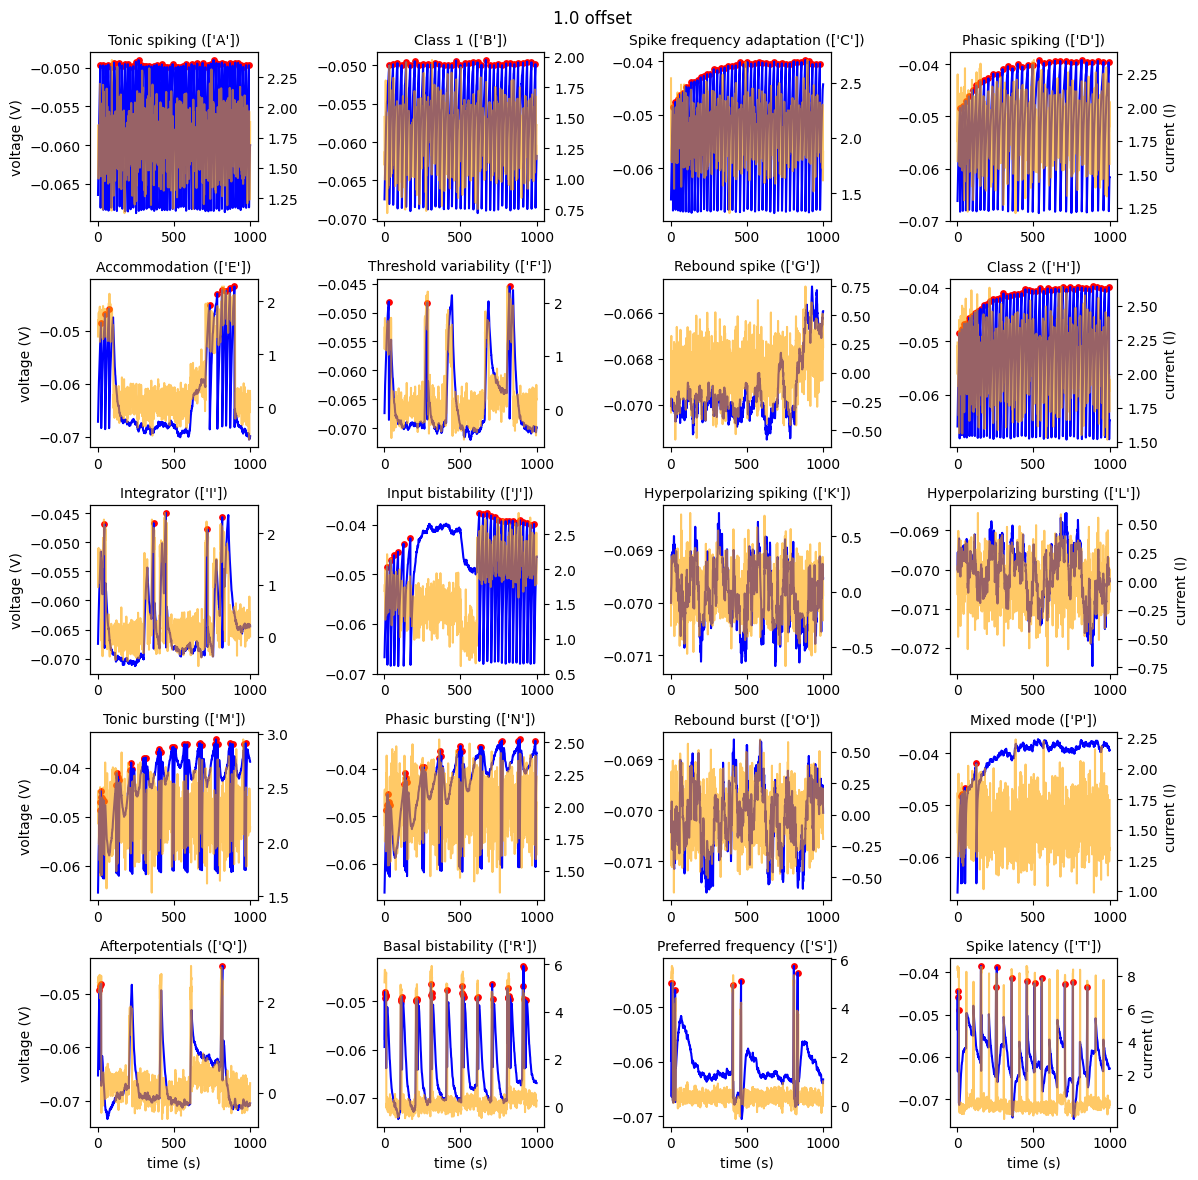

In [ ]:
noise_levels = [0.1, 0.2, 0.5, 1.0, 2, 5, 10]
offset_levels = [0.1, 0.2, 0.5, 1.0, 2, 5, 10]
jitter = 10

add_noise = True
temp_jitter = True
add_offset = True

bar = progressbar.ProgressBar(maxval=len(noise_levels)*len(offset_levels),
                            widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
bar.start()

for offset_counter, offset in enumerate(noise_levels):
    for noise_counter, noise in enumerate(noise_levels):
        # load data
        data_type = f'{noise}_noise_{jitter}_jitter_{offset}_offset'
        filename = 'data_encoding_fix_len_' + data_type
        infile = open(f"{data_path}/{filename}.pkl", 'rb')
        data = pickle.load(infile)
        infile.close()

        # create plots
        # TODO include param values in figure name!!!
        plot_traces_fix_len_param_sweep(path, data, max_trials=max_trials, offset=offset, noise=noise, jitter=jitter,
                            add_offset=add_offset, add_noise=add_noise, temp_jitter=temp_jitter)

        plot_single_isi_fix_len_param_sweep(path, data, max_trials=max_trials, offset=offset, noise=noise, jitter=jitter,
                                add_offset=add_offset, add_noise=add_noise, temp_jitter=temp_jitter, norm_count=True, norm_time=True)

        plot_isi_fix_len_param_sweep(path, data, max_trials=max_trials, offset=offset, noise=noise, jitter=jitter,
                        add_offset=add_offset, add_noise=add_noise, temp_jitter=temp_jitter, norm_count=True, norm_time=True)
        
        bar.update(offset_counter*len(noise_levels)+noise_counter)
bar.finish()

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.